In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_spkir import Parser

In [3]:
# Coastal Endurance Oregon Shelf Surface Mooring NSIF (7 meters) spkir data
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00003/cg_data/dcl26/spkir/"
fname = "20160518.spkir.log"

# initialize the Parser object for MOPAK
spkir = Parser(baseurl + fname)
r = requests.get(spkir.infile, verify=True) # use verify=False for expired certificate

In [4]:
spkir.raw = r.content
len(spkir.raw), spkir.raw[:50]

(1370196, b'2016/05/18 00:00:14.411 [spkir:DLOGP8]:Instrument ')

In [5]:
spkir.parse_data()
spkir.data.keys()

dict_keys(['sample_delay', 'serial_number', 'frame_counter', 'raw_channels', 'input_voltage', 'timer', 'internal_temperature', 'analog_rail_voltage', 'time', 'date_time_string'])

In [6]:
spkir.data.time[:5]

[1463529615.421, 1463529616.428, 1463529617.43, 1463529618.438, 1463529619.438]

In [7]:
df = pd.DataFrame(spkir.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((16153, 11),
 Index(['analog_rail_voltage', 'date_time_string', 'frame_counter',
        'input_voltage', 'internal_temperature', 'raw_channels', 'sample_delay',
        'serial_number', 'time', 'timer', 'dt_utc'],
       dtype='object'))

In [9]:
df.dtypes

analog_rail_voltage              int64
date_time_string                object
frame_counter                    int64
input_voltage                    int64
internal_temperature             int64
raw_channels                    object
sample_delay                     int64
serial_number                    int64
time                           float64
timer                          float64
dt_utc                  datetime64[ns]
dtype: object

In [10]:
df.tail(5)

analog_rail_voltage         date_time_string  \
dt_utc                                                                  
2016-05-18 23:47:57.400                  178  2016/05/18 23:47:57.400   
2016-05-18 23:47:58.403                  178  2016/05/18 23:47:58.403   
2016-05-18 23:47:59.407                  178  2016/05/18 23:47:59.407   
2016-05-18 23:48:00.411                  178  2016/05/18 23:48:00.411   
2016-05-18 23:48:01.415                  178  2016/05/18 23:48:01.415   

                         frame_counter  input_voltage  internal_temperature  \
dt_utc                                                                        
2016-05-18 23:47:57.400            167            281                   131   
2016-05-18 23:47:58.403            168            284                   131   
2016-05-18 23:47:59.407            169            281                   131   
2016-05-18 23:48:00.411            170            285                   131   
2016-05-18 23:48:01.415            171            284                   131   

                                                              raw_channels  \
dt_utc                                                                       
2016-05-18 23:47:57.400  [2149931456, 2149406528, 2154223616, 215595411...   
2016-05-18 23:47:58.403  [2149943040, 2149422784, 2154364544, 215616582...   
2016-05-18 23:47:59.407  [2150146368, 2149692864, 2155109312, 215708211...   
2016-05-18 23:48:00.411  [2150519232, 2150162048, 2155942592, 215791584...   
2016-05-18 23:48:01.415  [2149844864, 2149290688, 2154016192, 215572748...   

                         sample_delay  serial_number          time   timer  \
dt_utc                                                                       
2016-05-18 23:47:57.400          -133            297  1.463615e+09  172.69   
2016-05-18 23:47:58.403          -133            297  1.463615e+09  173.66   
2016-05-18 23:47:59.407          -133            297  1.463615e+09  174.62   
2016-05-18 23:48:00.411          -133            297  1.463615e+09  175.58   
2016-05-18 23:48:01.415          -133            297  1.463615e+09  176.69   

                                         dt_utc  
dt_utc                                           
2016-05-18 23:47:57.400 2016-05-18 23:47:57.400  
2016-05-18 23:47:58.403 2016-05-18 23:47:58.403  
2016-05-18 23:47:59.407 2016-05-18 23:47:59.407  
2016-05-18 23:48:00.411 2016-05-18 23:48:00.411  
2016-05-18 23:48:01.415 2016-05-18 23:48:01.415

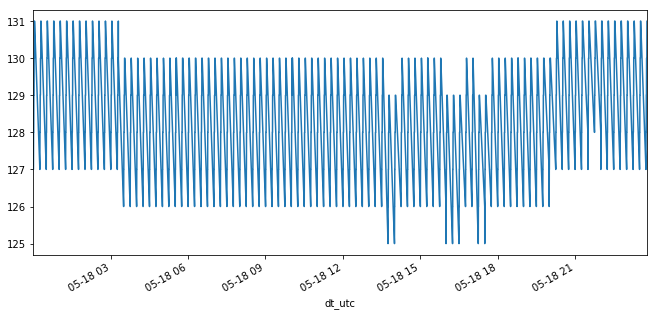

In [11]:
df['internal_temperature'].plot(figsize=(11,5));

In [12]:
# extract a specific downwelling irradiance channel from each list of raw_channels
df['ch1'] = [x[0] for x in df['raw_channels']]
df['ch4'] = [x[3] for x in df['raw_channels']]
df['ch7'] = [x[6] for x in df['raw_channels']]

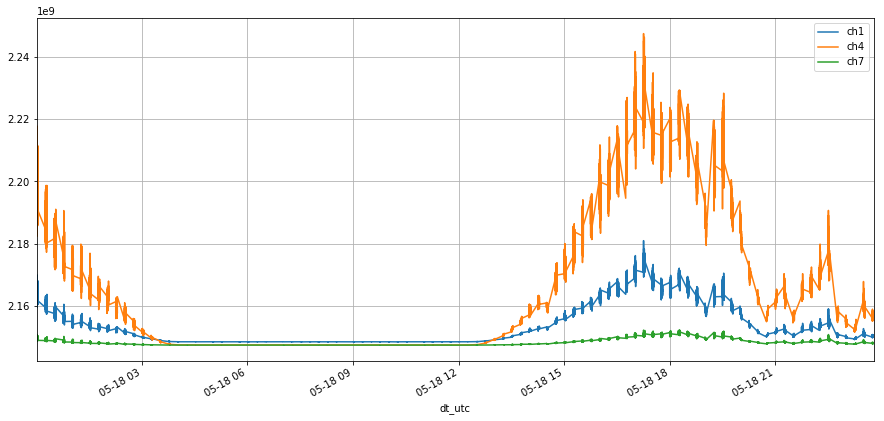

In [13]:
df[['ch1', 'ch4', 'ch7']].plot(figsize=(15,7), grid='on');